In [109]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
from wordcloud import WordCloud
pio.templates.default = "plotly_white"
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("instadata.csv", encoding="cp1252")
df.head(2)

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...


In [3]:
#Showing the stats of this dataset
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


In [4]:
#Checking to see if ther are any missing values
df.isnull().sum()

#This shows there are no missing values 
#You can also use data.info() to get more statistics about this data

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [175]:
#Distribution of Impressions. 
fig = px.histogram(data_frame=df, x="Impressions", title="Distribution of Impressions")

fig.update_layout(xaxis_gridwidth=True, yaxis_gridwidth=True)
fig.show()

In [39]:
#The distribution of the Impressions:
fig = px.line(data_frame=df, y="Impressions", title="Impressions Over Time")
fig.show()

In [43]:
#Looking at all metrices like Likes, Saves and Follows

fig = px.line(data_frame=df, y=["Likes", "Saves", "Follows"], title="Metrices Over Time")
fig.update_layout(
    xaxis_title = "Date",
    yaxis_title = 'Count'
)

fig.show()

In [57]:
# Distribution of Reach from Different sources

category_columns = ['From Home', 'From Hashtags', 'From Explore', 'From Other']
#Melted the columns into one 
melted_df = df.melt(value_vars=category_columns, var_name='category', value_name='value')
fig = px.pie(melted_df, names='category', values='value', title='Reach from Different Sources')
fig.show()


In [58]:
#Distribution of Engagement sources

category_columns = ['Likes', 'Saves', 'Shares', 'Comments']
melted_df = df.melt(value_vars=category_columns, var_name='category', value_name='value')
fig = px.pie(melted_df, names='category', values='value', title='Engagement Sources')
fig.show()

In [80]:
#Relatonship between Profile visits and Follows

x_values = df["Profile Visits"]
y_values = df["Follows"]

#Defining the values for Line
line_x_values = [0, x_values.max()]
line_y_values = [0 , 250]

#Creating the Scatter plot and line 
scatter = go.Scatter(x=x_values, y=y_values, mode='markers', name="Scatter plot")
line_trace = go.Scatter(x=line_x_values, y=line_y_values, mode='lines', name='Line')


fig = go.Figure()
fig.add_trace(scatter)
fig.add_trace(line_trace)

fig.update_layout(title = "Profile Visits Vs. Follows")

fig.show()

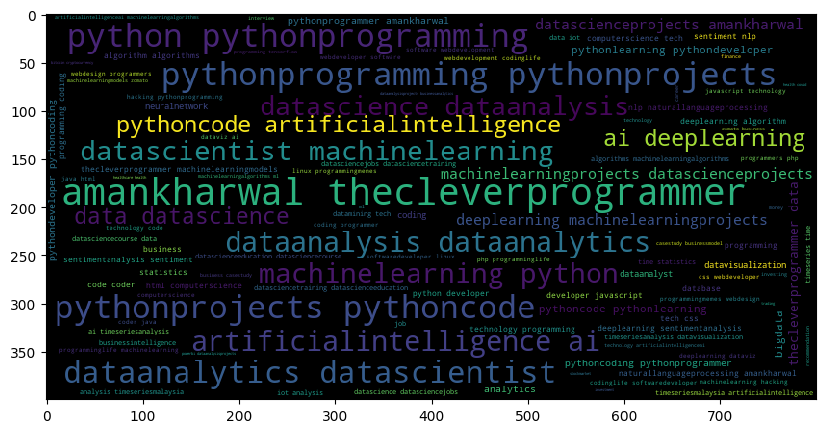

In [107]:
#Showing Hashtags using wordcloud

hashtags_list = df['Hashtags']
all_hashtags = ' '.join(hashtags_list)
wordcloud = WordCloud(width=800, height=400, background_color='black').generate(all_hashtags)
plt.figure(figsize=(10, 5))

#Interpolation is the used to estimate the value of a function.
plt.imshow(wordcloud, interpolation='nearest')
plt.show()


In [115]:
#Correlation matrix
df_numeric = df.select_dtypes(include=[np.number])
corr_plt = df_numeric.corr()


fig = go.Figure(data=go.Heatmap(
    z=corr_plt.values,
    x=corr_plt.columns,
    y=corr_plt.columns,
    colorscale='Viridis',  # Adjust the color scale as needed
))

fig.update_layout(title="Correlation Matrix", 
                  width= 800, height= 400)

fig.show()

In [153]:
hashtag_counts = (
    df['Hashtags'].str.split().explode())


fig = px.histogram(hashtag_counts, title='Distribution of Hashtags')

fig.update_layout(
    xaxis_title='Hashtag',
    yaxis_title='Count')
fig.show()


## Summary of the Above Tasks

- Looked at data, its columns. Explored data using its statistics and checked for missing values
- Using Histogram looked at distribution of Impressions 
- Explored Impressions on post over time
- Explored Entities like "Likes, Saves, Follows" from each post
- Using a pie chart looked at Reach and engagment from different sources 
- Used wordcloud and created a Correlation matrix 
- Explored more info using Hashtags data